## 1. Data Loading and Initial Overview

We begin by loading the CS students dataset and performing an initial inspection to understand the dataset structure, data types, and basic statistics.


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings

# Suppress warnings for cleaner output
filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Load the dataset
df = pd.read_csv('cs_students.csv')

# Display basic information
print("="*80)
print("DATASET OVERVIEW")
print("="*80)
print(f"\nDataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print("\nFirst 5 rows:")
print(df.head())

print("\n" + "="*80)
print("COLUMN DATA TYPES")
print("="*80)
df.info()

print("\n" + "="*80)
print("DESCRIPTIVE STATISTICS")
print("="*80)
print(df.describe())


DATASET OVERVIEW

Dataset Shape: 180 rows × 12 columns

First 5 rows:
   Student ID           Name  Gender  Age  GPA             Major  \
0           1     John Smith    Male   21  3.5  Computer Science   
1           2  Alice Johnson  Female   20  3.2  Computer Science   
2           3   Robert Davis    Male   22  3.8  Computer Science   
3           4   Emily Wilson  Female   21  3.7  Computer Science   
4           5  Michael Brown    Male   23  3.4  Computer Science   

         Interested Domain             Projects                 Future Career  \
0  Artificial Intelligence  Chatbot Development   Machine Learning Researcher   
1             Data Science       Data Analytics                Data Scientist   
2     Software Development   E-commerce Website             Software Engineer   
3          Web Development   Full-Stack Web App                 Web Developer   
4            Cybersecurity     Network Security  Information Security Analyst   

    Python     SQL     Java  
0   

### Columns to Omit

We will **drop the following columns** from our analysis:
- **Student ID**: Unique identifier with no predictive value
- **Name**: Personal identifier with no predictive value
- **Gender**: Demographic information that should not bias career predictions
- **Age**: Demographic information that should not bias career predictions
- **Major**: All students are Computer Science majors (constant value)


In [47]:
# Define columns to drop
columns_to_drop = ['Student ID', 'Name', 'Gender', 'Age', 'Major']

print("Columns to be omitted from analysis:")
for col in columns_to_drop:
    print(f"  - {col}")

# Create a working dataframe
df_work = df.drop(columns=columns_to_drop)

print(f"\nWorking dataset shape after dropping columns: {df_work.shape[0]} rows × {df_work.shape[1]} columns")
print(f"\nRemaining columns:\n{df_work.columns.tolist()}")


Columns to be omitted from analysis:
  - Student ID
  - Name
  - Gender
  - Age
  - Major

Working dataset shape after dropping columns: 180 rows × 7 columns

Remaining columns:
['GPA', 'Interested Domain', 'Projects', 'Future Career', 'Python', 'SQL', 'Java']


## 2. Exploratory Data Analysis (EDA)

### Missing Values Analysis

Let's check if there are any missing values in our dataset that need to be addressed.


In [48]:
print("="*80)
print("MISSING VALUES ANALYSIS")
print("="*80)

missing_values = df_work.isnull().sum()
missing_percentage = (df_work.isnull().sum() / len(df_work)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percentage
})

print("\nMissing values per column:")
print(missing_df)

if missing_df['Missing Count'].sum() == 0:
    print("\nNo missing values detected in the dataset!")
else:
    print(f"\nTotal missing values: {missing_df['Missing Count'].sum()}")


MISSING VALUES ANALYSIS

Missing values per column:
                   Missing Count  Percentage
GPA                            0         0.0
Interested Domain              0         0.0
Projects                       0         0.0
Future Career                  0         0.0
Python                         0         0.0
SQL                            0         0.0
Java                           0         0.0

No missing values detected in the dataset!


### Duplicate Records Check

Let's verify if there are any duplicate records in the dataset. (This is for the EDA purpose, but there could be duplicates because of the absence of unique identifiers like Student ID. In a real-world scenario, we would need to investigate duplicates further to determine if they are true duplicates or different students with identical profiles.)


In [49]:
print("="*80)
print("DUPLICATE RECORDS CHECK")
print("="*80)

duplicate_count = df_work.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")

if duplicate_count == 0:
    print("✓ No duplicate records found!")
else:
    print(f"Found {duplicate_count} duplicate records that may need attention")


DUPLICATE RECORDS CHECK

Number of duplicate rows: 69
Found 69 duplicate records that may need attention


### Target Variable Analysis

Our target variable is **Future Career**. Let's analyze its distribution to understand the career paths students are pursuing.


TARGET VARIABLE: Future Career

Unique career paths: 33

Career distribution:
Future Career
Web Developer                   19
Information Security Analyst    17
Mobile App Developer            17
Database Administrator          16
Cloud Solutions Architect       16
Software Engineer               14
Machine Learning Engineer       13
NLP Research Scientist          11
Graphics Programmer              9
Data Scientist                   8
Data Analyst                     6
AI Researcher                    6
Game Developer                   4
Bioinformatician                 2
UX Designer                      2
Healthcare IT Specialist         2
Quantum Computing Researcher     2
Machine Learning Researcher      1
Security Analyst                 1
Embedded Software Engineer       1
Robotics Engineer                1
Ethical Hacker                   1
Computer Vision Engineer         1
DevOps Engineer                  1
IoT Developer                    1
NLP Engineer                     

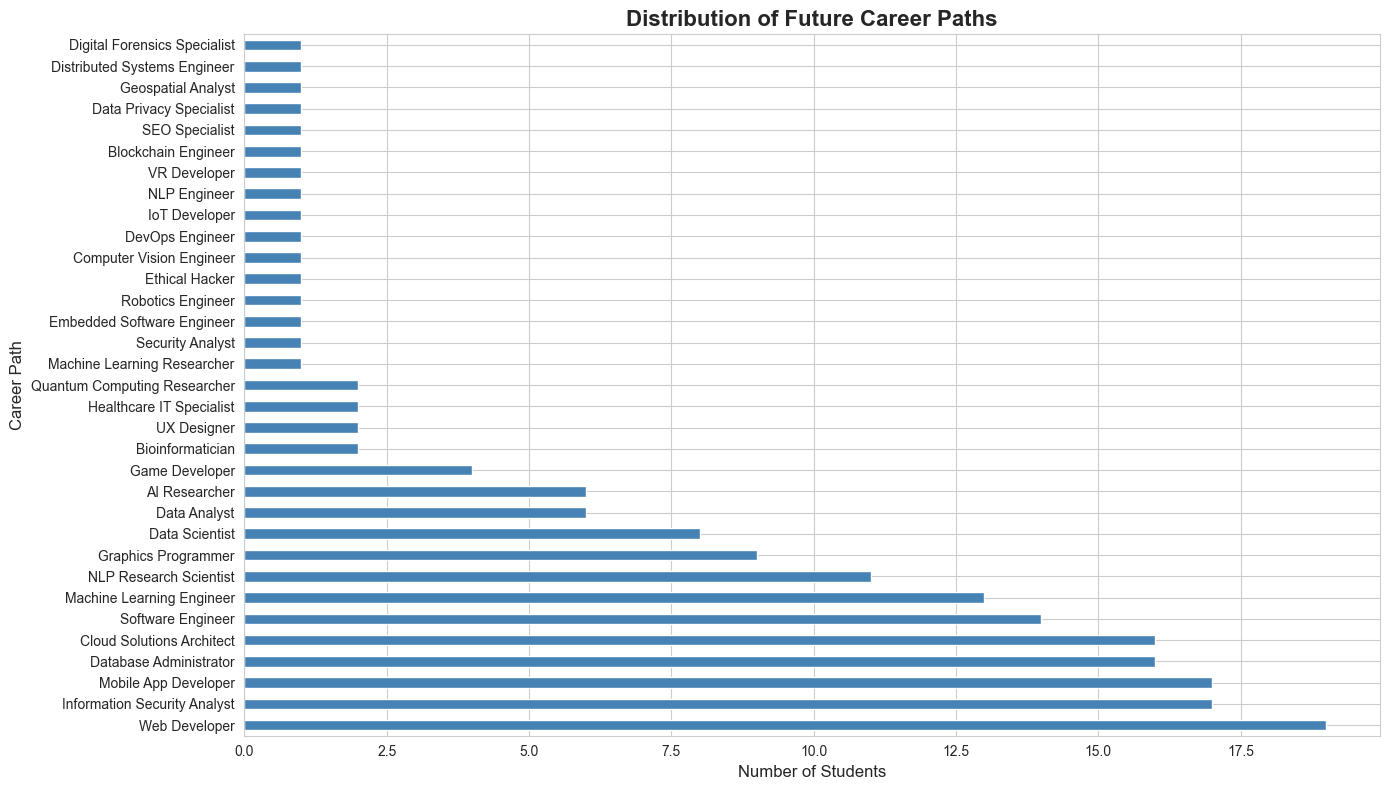


Class Balance Analysis:
Most common career: Web Developer (19 students, 10.6%)
Least common career: Digital Forensics Specialist (1 students, 0.6%)


In [50]:
print("="*80)
print("TARGET VARIABLE: Future Career")
print("="*80)

# Count of each career
career_counts = df_work['Future Career'].value_counts()
print(f"\nUnique career paths: {df_work['Future Career'].nunique()}")
print(f"\nCareer distribution:\n{career_counts}")

# Visualization
plt.figure(figsize=(14, 8))
career_counts.plot(kind='barh', color='steelblue')
plt.title('Distribution of Future Career Paths', fontsize=16, fontweight='bold')
plt.xlabel('Number of Students', fontsize=12)
plt.ylabel('Career Path', fontsize=12)
plt.tight_layout()
plt.show()

# Check for class imbalance
print(f"\nClass Balance Analysis:")
print(f"Most common career: {career_counts.index[0]} ({career_counts.iloc[0]} students, {career_counts.iloc[0]/len(df_work)*100:.1f}%)")
print(f"Least common career: {career_counts.index[-1]} ({career_counts.iloc[-1]} students, {career_counts.iloc[-1]/len(df_work)*100:.1f}%)")


### Numerical Feature Analysis: GPA Distribution

GPA is the only numerical feature in our working dataset. Let's analyze its distribution and relationship with career paths.


GPA ANALYSIS

GPA Statistics:
count    180.000000
mean       3.615000
std        0.177341
min        3.200000
25%        3.500000
50%        3.600000
75%        3.700000
max        3.900000
Name: GPA, dtype: float64


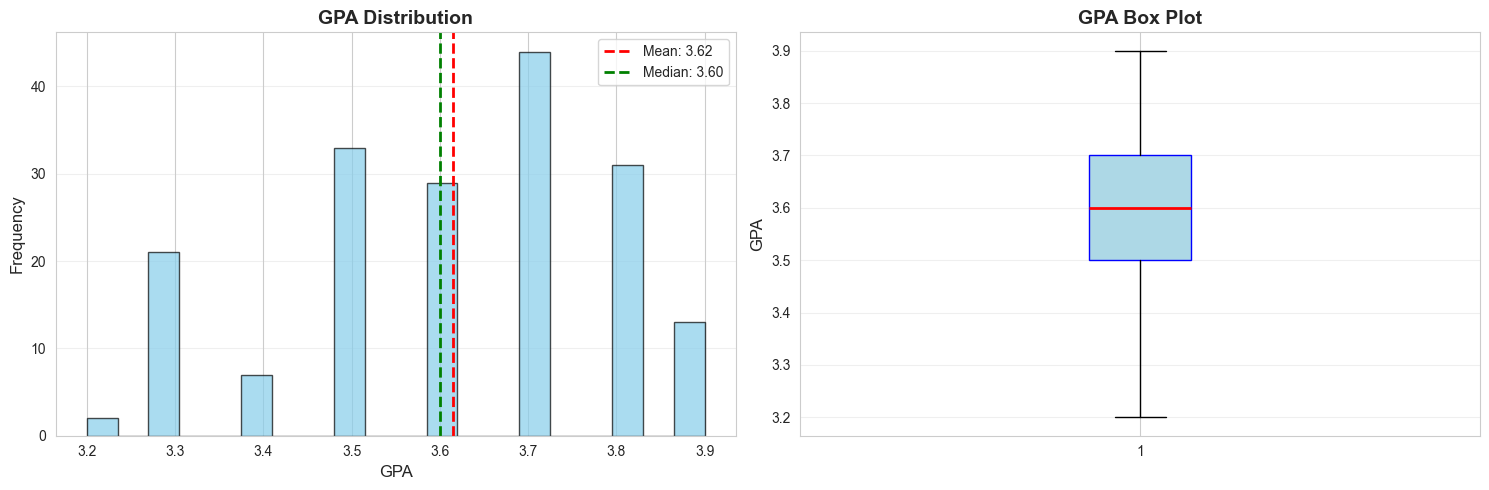

In [51]:
print("="*80)
print("GPA ANALYSIS")
print("="*80)

print(f"\nGPA Statistics:")
print(df_work['GPA'].describe())

# GPA Distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram with KDE
axes[0].hist(df_work['GPA'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].axvline(df_work['GPA'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df_work["GPA"].mean():.2f}')
axes[0].axvline(df_work['GPA'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df_work["GPA"].median():.2f}')
axes[0].set_title('GPA Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('GPA', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Box plot
axes[1].boxplot(df_work['GPA'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='blue'),
                medianprops=dict(color='red', linewidth=2))
axes[1].set_title('GPA Box Plot', fontsize=14, fontweight='bold')
axes[1].set_ylabel('GPA', fontsize=12)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


### GPA by Career Path

Let's examine how GPA varies across different career paths.


Average GPA by Career Path:
                              mean   std  count
Future Career                                  
Distributed Systems Engineer  3.90   NaN      1
NLP Engineer                  3.90   NaN      1
Quantum Computing Researcher  3.80  0.00      2
DevOps Engineer               3.80   NaN      1
Data Privacy Specialist       3.80   NaN      1
NLP Research Scientist        3.75  0.08     11
Machine Learning Engineer     3.75  0.19     13
Software Engineer             3.72  0.16     14
VR Developer                  3.70   NaN      1
Bioinformatician              3.70  0.00      2
Security Analyst              3.70   NaN      1
Cloud Solutions Architect     3.68  0.14     16
Information Security Analyst  3.64  0.12     17
AI Researcher                 3.63  0.18      6
Web Developer                 3.63  0.15     19
Ethical Hacker                3.60   NaN      1
Digital Forensics Specialist  3.60   NaN      1
Geospatial Analyst            3.60   NaN      1
Graphics Pro

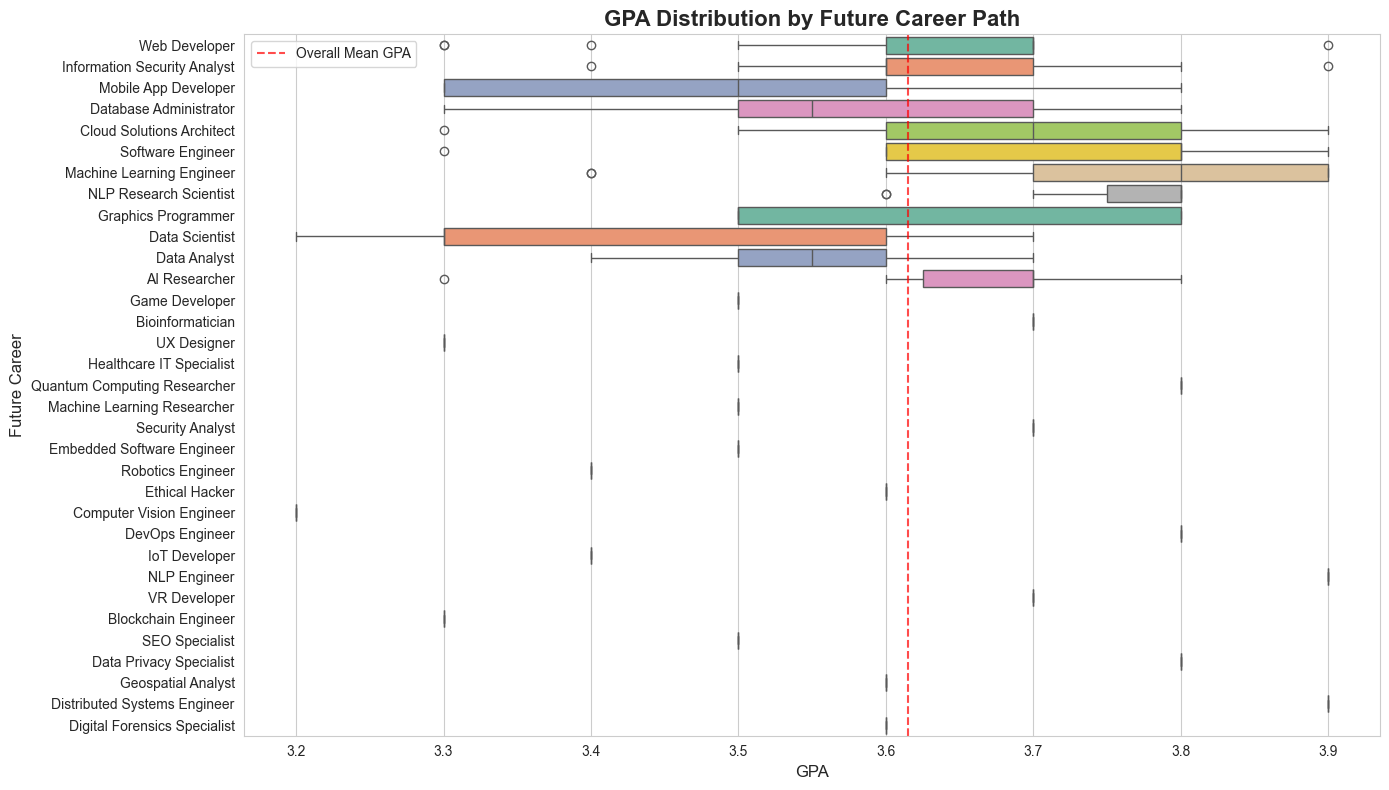

In [52]:
# Calculate average GPA by career
gpa_by_career = df_work.groupby('Future Career')['GPA'].agg(['mean', 'std', 'count']).sort_values('mean', ascending=False)
print("Average GPA by Career Path:")
print(gpa_by_career.round(2))

# Visualization
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_work, y='Future Career', x='GPA', palette='Set2', order=career_counts.index)
plt.title('GPA Distribution by Future Career Path', fontsize=16, fontweight='bold')
plt.xlabel('GPA', fontsize=12)
plt.ylabel('Future Career', fontsize=12)
plt.axvline(df_work['GPA'].mean(), color='red', linestyle='--', linewidth=1.5, alpha=0.7, label='Overall Mean GPA')
plt.legend()
plt.tight_layout()
plt.show()


### Categorical Features Analysis

Let's analyze the categorical features: **Interested Domain**, **Projects**, **Python**, **SQL**, and **Java** skills.


In [53]:
# Define categorical features (excluding Future Career which is our target)
categorical_features = ['Interested Domain', 'Projects', 'Python', 'SQL', 'Java']

print("="*80)
print("CATEGORICAL FEATURES OVERVIEW")
print("="*80)

for feature in categorical_features:
    unique_count = df_work[feature].nunique()
    print(f"\n{feature}:")
    print(f"  - Unique values: {unique_count}")
    print(f"  - Top 5 most common:\n{df_work[feature].value_counts().head()}")


CATEGORICAL FEATURES OVERVIEW

Interested Domain:
  - Unique values: 27
  - Top 5 most common:
Interested Domain
Artificial Intelligence    19
Web Development            19
Cybersecurity              18
Mobile App Development     17
Database Management        16
Name: count, dtype: int64

Projects:
  - Unique values: 65
  - Top 5 most common:
Projects
Network Security               14
Natural Language Processing    14
E-commerce Website             13
SQL Query Optimization          9
AWS Deployment                  8
Name: count, dtype: int64

Python:
  - Unique values: 3
  - Top 5 most common:
Python
Strong     70
Weak       64
Average    46
Name: count, dtype: int64

SQL:
  - Unique values: 3
  - Top 5 most common:
SQL
Strong     79
Average    60
Weak       41
Name: count, dtype: int64

Java:
  - Unique values: 3
  - Top 5 most common:
Java
Strong     69
Weak       64
Average    47
Name: count, dtype: int64


### Programming Skills Distribution

Let's visualize the distribution of programming language proficiency levels (Python, SQL, Java).


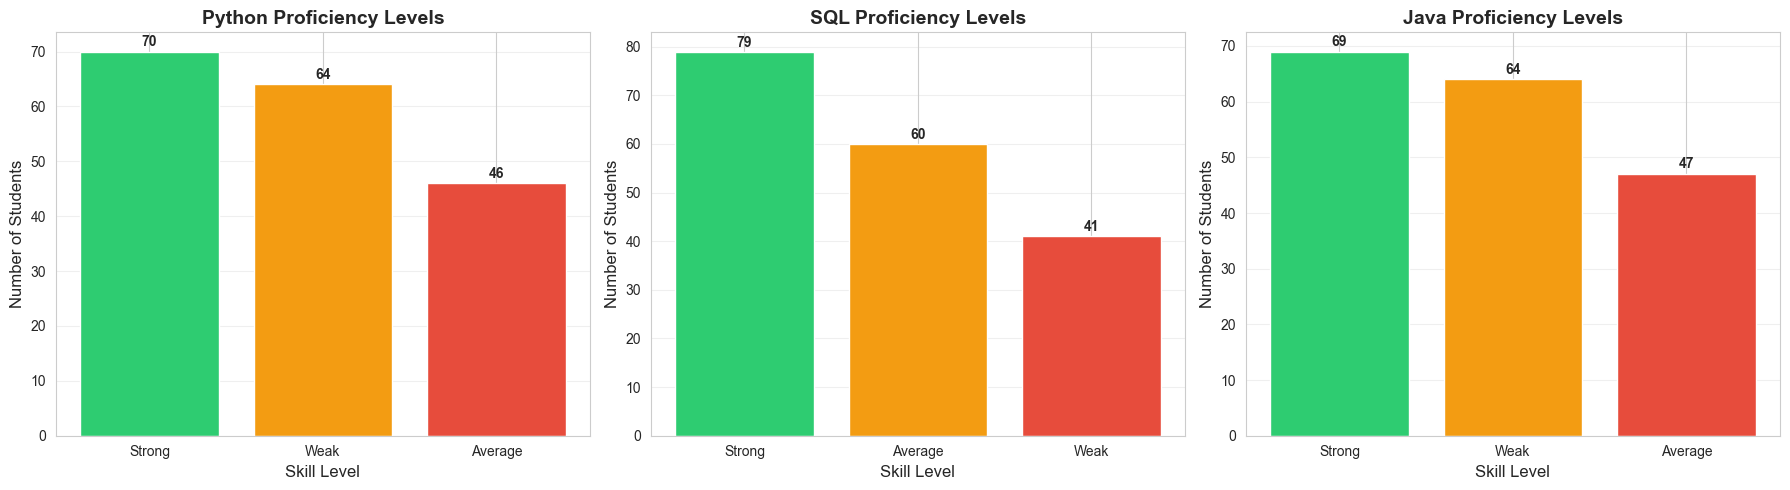


Programming Skills Summary:

Python:
Python
Strong     70
Weak       64
Average    46
Name: count, dtype: int64

SQL:
SQL
Strong     79
Average    60
Weak       41
Name: count, dtype: int64

Java:
Java
Strong     69
Weak       64
Average    47
Name: count, dtype: int64


In [54]:
# Programming skills analysis
skills = ['Python', 'SQL', 'Java']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, skill in enumerate(skills):
    skill_counts = df_work[skill].value_counts()
    axes[idx].bar(skill_counts.index, skill_counts.values, color=['#2ecc71', '#f39c12', '#e74c3c'])
    axes[idx].set_title(f'{skill} Proficiency Levels', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Skill Level', fontsize=12)
    axes[idx].set_ylabel('Number of Students', fontsize=12)
    axes[idx].grid(axis='y', alpha=0.3)

    # Add value labels on bars
    for i, v in enumerate(skill_counts.values):
        axes[idx].text(i, v + 1, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Overall skills summary
print("\nProgramming Skills Summary:")
for skill in skills:
    print(f"\n{skill}:")
    print(df_work[skill].value_counts())


### Interested Domain Distribution

Let's examine the distribution of students' interested domains.


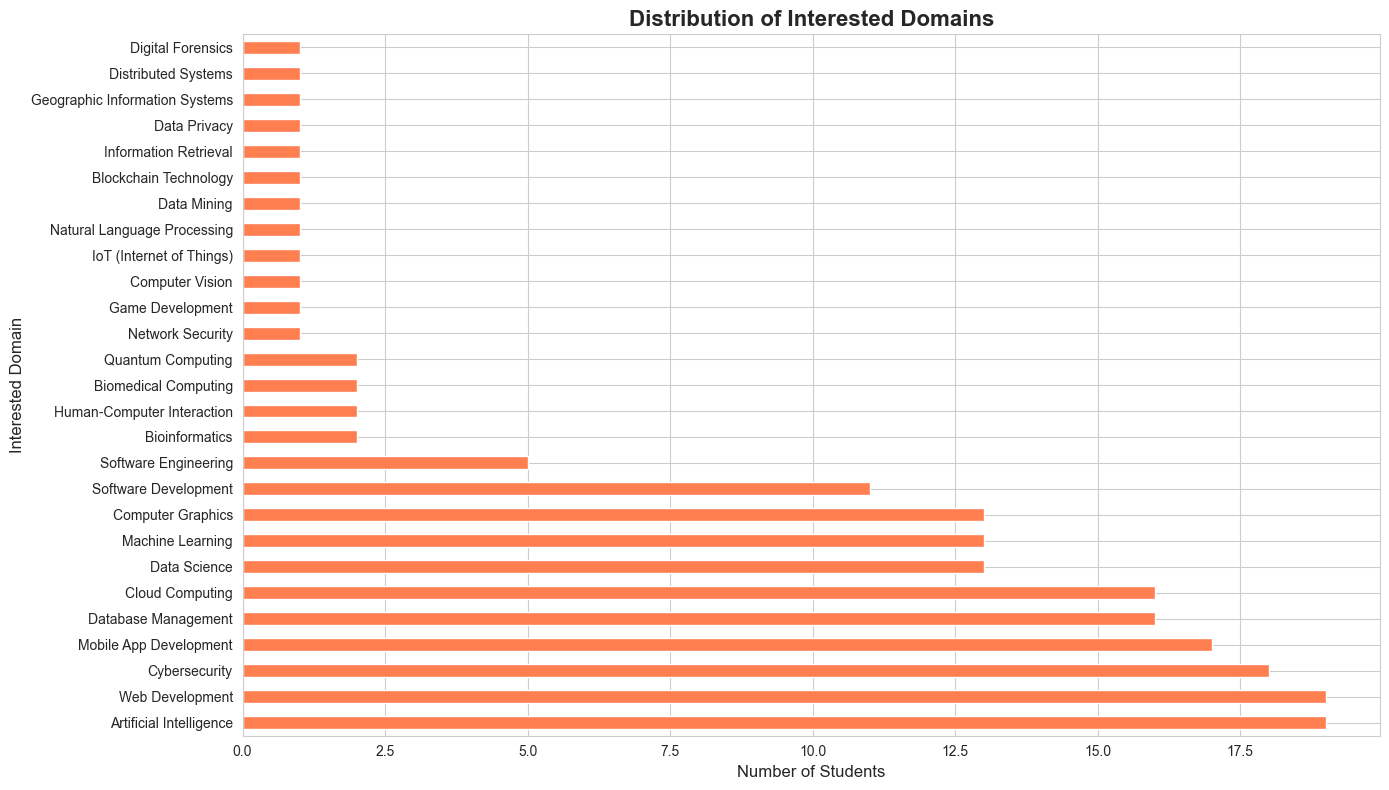


Total unique domains: 27

Top 5 most popular domains:
Interested Domain
Artificial Intelligence    19
Web Development            19
Cybersecurity              18
Mobile App Development     17
Database Management        16
Name: count, dtype: int64


In [55]:
domain_counts = df_work['Interested Domain'].value_counts()

plt.figure(figsize=(14, 8))
domain_counts.plot(kind='barh', color='coral')
plt.title('Distribution of Interested Domains', fontsize=16, fontweight='bold')
plt.xlabel('Number of Students', fontsize=12)
plt.ylabel('Interested Domain', fontsize=12)
plt.tight_layout()
plt.show()

print(f"\nTotal unique domains: {len(domain_counts)}")
print(f"\nTop 5 most popular domains:\n{domain_counts.head()}")


### Relationship Between Interested Domain and Future Career

Let's create a cross-tabulation to see how interested domains align with future career paths.


Cross-tabulation: Interested Domain vs Future Career
Future Career                   AI Researcher  Bioinformatician  \
Interested Domain                                                 
Artificial Intelligence                     6                 0   
Bioinformatics                              0                 2   
Biomedical Computing                        0                 0   
Blockchain Technology                       0                 0   
Cloud Computing                             0                 0   
Computer Graphics                           0                 0   
Computer Vision                             0                 0   
Cybersecurity                               0                 0   
Data Mining                                 0                 0   
Data Privacy                                0                 0   
Data Science                                0                 0   
Database Management                         0                 0   
Digital F

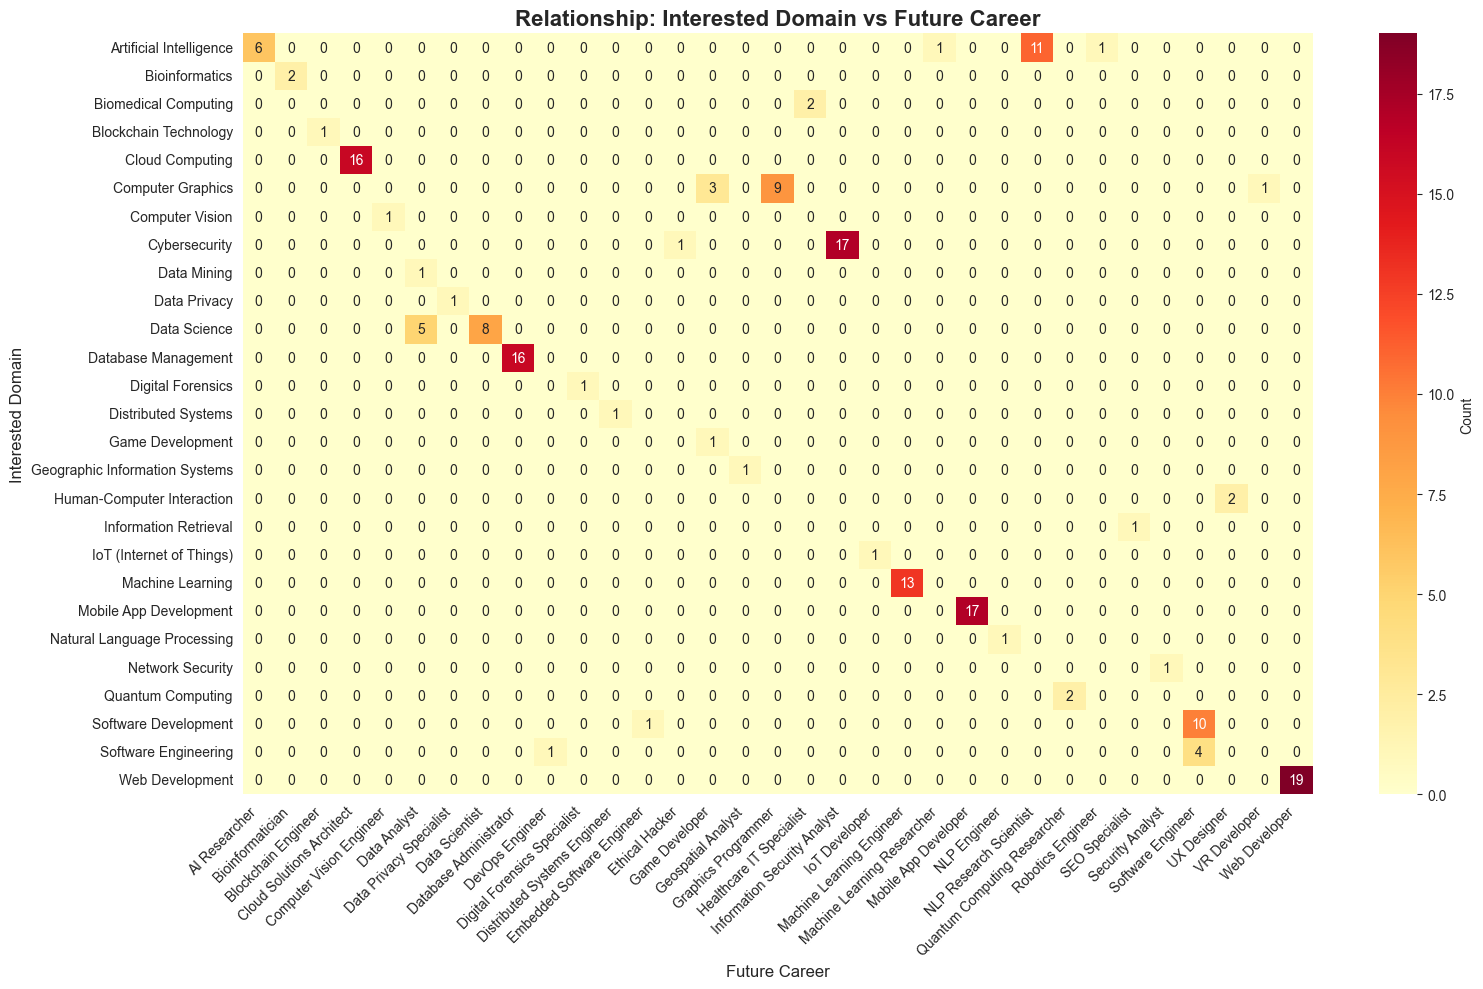

In [56]:
# Create crosstab
domain_career_crosstab = pd.crosstab(df_work['Interested Domain'], df_work['Future Career'])

# Show the most common domain-career combinations
print("Cross-tabulation: Interested Domain vs Future Career")
print(domain_career_crosstab)

# Heatmap visualization
plt.figure(figsize=(16, 10))
sns.heatmap(domain_career_crosstab, annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': 'Count'})
plt.title('Relationship: Interested Domain vs Future Career', fontsize=16, fontweight='bold')
plt.xlabel('Future Career', fontsize=12)
plt.ylabel('Interested Domain', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### Skills Profile by Career Path

Let's analyze which programming skills are most common for each career path.


In [57]:
# For each career, show the most common skill level for each programming language
print("="*80)
print("SKILLS PROFILE BY CAREER PATH")
print("="*80)

for career in df_work['Future Career'].unique()[:10]:  # Show first 10 careers for brevity
    career_df = df_work[df_work['Future Career'] == career]
    print(f"\n{career} (n={len(career_df)}):")
    print(f"  Python: {career_df['Python'].value_counts().to_dict()}")
    print(f"  SQL: {career_df['SQL'].value_counts().to_dict()}")
    print(f"  Java: {career_df['Java'].value_counts().to_dict()}")


SKILLS PROFILE BY CAREER PATH

Machine Learning Researcher (n=1):
  Python: {'Strong': 1}
  SQL: {'Strong': 1}
  Java: {'Weak': 1}

Data Scientist (n=8):
  Python: {'Average': 7, 'Strong': 1}
  SQL: {'Strong': 7, 'Average': 1}
  Java: {'Weak': 8}

Software Engineer (n=14):
  Python: {'Strong': 9, 'Average': 5}
  SQL: {'Strong': 8, 'Weak': 6}
  Java: {'Average': 8, 'Strong': 6}

Web Developer (n=19):
  Python: {'Weak': 15, 'Strong': 4}
  SQL: {'Strong': 18, 'Average': 1}
  Java: {'Strong': 13, 'Average': 5, 'Weak': 1}

Information Security Analyst (n=17):
  Python: {'Average': 8, 'Weak': 6, 'Strong': 3}
  SQL: {'Weak': 8, 'Strong': 6, 'Average': 3}
  Java: {'Strong': 8, 'Average': 6, 'Weak': 3}

Machine Learning Engineer (n=13):
  Python: {'Strong': 13}
  SQL: {'Average': 12, 'Weak': 1}
  Java: {'Weak': 13}

Database Administrator (n=16):
  Python: {'Average': 10, 'Weak': 6}
  SQL: {'Strong': 11, 'Weak': 5}
  Java: {'Average': 6, 'Weak': 5, 'Strong': 5}

Cloud Solutions Architect (n=16)

## 3. Preprocessing Pipeline Definition

Now we'll create a robust preprocessing pipeline that will transform our features appropriately for machine learning models.

The pipeline will:
- **Numerical features (GPA)**: Apply StandardScaler for normalization
- **Categorical features**: Apply OneHotEncoder to convert categories to binary features
- **Handle unknown categories**: Configure encoder to handle unseen categories during prediction


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

print("="*80)
print("PREPROCESSING PIPELINE SETUP")
print("="*80)

# Define features (X) and target (y)
X = df_work.drop(columns=['Future Career'])
y = df_work['Future Career']

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Identify feature types
numerical_features = ['GPA']
categorical_features = ['Interested Domain', 'Projects', 'Python', 'SQL', 'Java']

print(f"\nNumerical features: {numerical_features}")
print(f"Categorical features: {categorical_features}")

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='drop'
)

print("\nPreprocessing pipeline created successfully!")
print("\nPipeline structure:")
print("  1. Numerical: StandardScaler for GPA normalization")
print("  2. Categorical: OneHotEncoder for categorical features")


PREPROCESSING PIPELINE SETUP

Features shape: (180, 6)
Target shape: (180,)

Numerical features: ['GPA']
Categorical features: ['Interested Domain', 'Projects', 'Python', 'SQL', 'Java']

Preprocessing pipeline created successfully!

Pipeline structure:
  1. Numerical: StandardScaler for GPA normalization
  2. Categorical: OneHotEncoder for categorical features


### Train-Test Split

Split the data into training (80%) and testing (20%) sets.

**Note**: Stratification is not used here due to the presence of many career classes with only a single instance, which would make stratified splitting impossible. The random split with a fixed seed ensures reproducibility.


In [59]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("="*80)
print("TRAIN-TEST SPLIT")
print("="*80)
print(f"\nTraining set:")
print(f"  - X_train shape: {X_train.shape}")
print(f"  - y_train shape: {y_train.shape}")
print(f"\nTest set:")
print(f"  - X_test shape: {X_test.shape}")
print(f"  - y_test shape: {y_test.shape}")

print(f"\nClass distribution in training set:")
print(y_train.value_counts().head())

print(f"\nClass distribution in test set:")
print(y_test.value_counts().head())


TRAIN-TEST SPLIT

Training set:
  - X_train shape: (144, 6)
  - y_train shape: (144,)

Test set:
  - X_test shape: (36, 6)
  - y_test shape: (36,)

Class distribution in training set:
Future Career
Information Security Analyst    15
Software Engineer               14
Database Administrator          14
Web Developer                   14
NLP Research Scientist          11
Name: count, dtype: int64

Class distribution in test set:
Future Career
Mobile App Developer            10
Web Developer                    5
Cloud Solutions Architect        5
Database Administrator           2
Information Security Analyst     2
Name: count, dtype: int64


## 4. Model Training and Evaluation

### Selecting Evaluation Metrics

Given that this is a **multi-class classification problem** with multiple career paths to predict, we need to carefully select appropriate evaluation metrics.

#### Metric Selection Rationale:

**Problem Context**: We are predicting which career path a CS student is likely to pursue based on their interests, skills, and GPA. Each prediction should be evaluated for:
- **Overall accuracy**: How often we predict the correct career
- **Per-class performance**: How well we predict each individual career path
- **Balanced performance**: Ensuring we don't favor majority classes

#### Primary Metrics:

1. **Accuracy**: Overall percentage of correct predictions
   - *Use case*: Quick overview of model performance
   - *Limitation*: Can be misleading with imbalanced classes

2. **F1-Score (Macro)**: Harmonic mean of precision and recall, averaged across all classes
   - *Use case*: Balances precision and recall across all career paths equally
   - *Advantage*: Treats all careers as equally important regardless of frequency
   - **This will be our PRIMARY optimization metric**

3. **F1-Score (Weighted)**: F1-score weighted by class frequency
   - *Use case*: Accounts for class imbalance in the dataset
   - *Advantage*: Reflects real-world class distribution

4. **Classification Report**: Detailed per-class precision, recall, and F1-score
   - *Use case*: Identify which careers are easier/harder to predict

#### Why F1-Score (Macro)?
Ensures we predict **all career paths** well, not just the most common ones, also balances both false positives and false negatives. Provides fairness across all classes in multi-class setting.


In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, f1_score, classification_report,
                             confusion_matrix, ConfusionMatrixDisplay)

print("="*80)
print("EVALUATION METRICS SELECTED")
print("="*80)
print("\nPrimary Metric: F1-Score (Macro)")
print("Secondary Metrics: Accuracy, F1-Score (Weighted), Classification Report")
print("\nRationale: Multi-class classification requires balanced evaluation across all career paths")


EVALUATION METRICS SELECTED

Primary Metric: F1-Score (Macro)
Secondary Metrics: Accuracy, F1-Score (Weighted), Classification Report

Rationale: Multi-class classification requires balanced evaluation across all career paths


### Model Selection and Training

We'll train a **Random Forest Classifier** as it:

Handles both numerical and categorical features well (after preprocessing), is resistant to overfitting through ensemble learning, provides feature importance insights, works well with multi-class classification problems and no assumptions about data distribution required


In [61]:
print("="*80)
print("MODEL TRAINING: Random Forest Classifier")
print("="*80)

# Create the full pipeline: preprocessing + model
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=200,          # Number of trees
        max_depth=15,              # Maximum depth of trees
        min_samples_split=5,       # Minimum samples to split a node
        min_samples_leaf=2,        # Minimum samples in leaf node
        random_state=42,
        n_jobs=-1,                 # Use all CPU cores
        class_weight='balanced'    # Handle class imbalance
    ))
])

print("\nTraining model...")
print("Model configuration:")
print("  - Algorithm: Random Forest")
print("  - Trees: 200")
print("  - Max depth: 15")
print("  - Class weight: balanced")

# Train the model
model_pipeline.fit(X_train, y_train)

print("\nModel training completed!")


MODEL TRAINING: Random Forest Classifier

Training model...
Model configuration:
  - Algorithm: Random Forest
  - Trees: 200
  - Max depth: 15
  - Class weight: balanced

Model training completed!


### Model Evaluation on Test Set

Let's evaluate our trained model's performance on the held-out test set.


In [62]:
print("="*80)
print("MODEL EVALUATION RESULTS")
print("="*80)

# Make predictions
y_pred = model_pipeline.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

print(f"\n{'='*60}")
print(f"  OVERALL PERFORMANCE METRICS")
print(f"{'='*60}")
print(f"  Accuracy:          {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"  F1-Score (Macro):  {f1_macro:.4f} (PRIMARY METRIC)")
print(f"  F1-Score (Weighted): {f1_weighted:.4f}")
print(f"{'='*60}")

# Detailed classification report
print(f"\n{'='*60}")
print(f"  DETAILED CLASSIFICATION REPORT")
print(f"{'='*60}")
print(classification_report(y_test, y_pred, zero_division=0))


MODEL EVALUATION RESULTS

  OVERALL PERFORMANCE METRICS
  Accuracy:          0.8611 (86.11%)
  F1-Score (Macro):  0.5949 (PRIMARY METRIC)
  F1-Score (Weighted): 0.8374

  DETAILED CLASSIFICATION REPORT
                              precision    recall  f1-score   support

               AI Researcher       1.00      1.00      1.00         1
            Bioinformatician       0.00      0.00      0.00         1
   Cloud Solutions Architect       1.00      1.00      1.00         5
                Data Analyst       1.00      1.00      1.00         1
     Data Privacy Specialist       0.00      0.00      0.00         0
              Data Scientist       1.00      1.00      1.00         1
      Database Administrator       1.00      1.00      1.00         2
Distributed Systems Engineer       0.00      0.00      0.00         1
              Ethical Hacker       0.00      0.00      0.00         1
              Game Developer       1.00      1.00      1.00         1
         Graphics Programme

### Confusion Matrix Analysis

The confusion matrix shows how predictions are distributed across actual career paths, helping identify which careers are confused with each other.


Confusion matrix shape: 18x18 (for 18 career paths)
Labels in test set: 16
Labels in predictions: 14
Total unique labels: 18


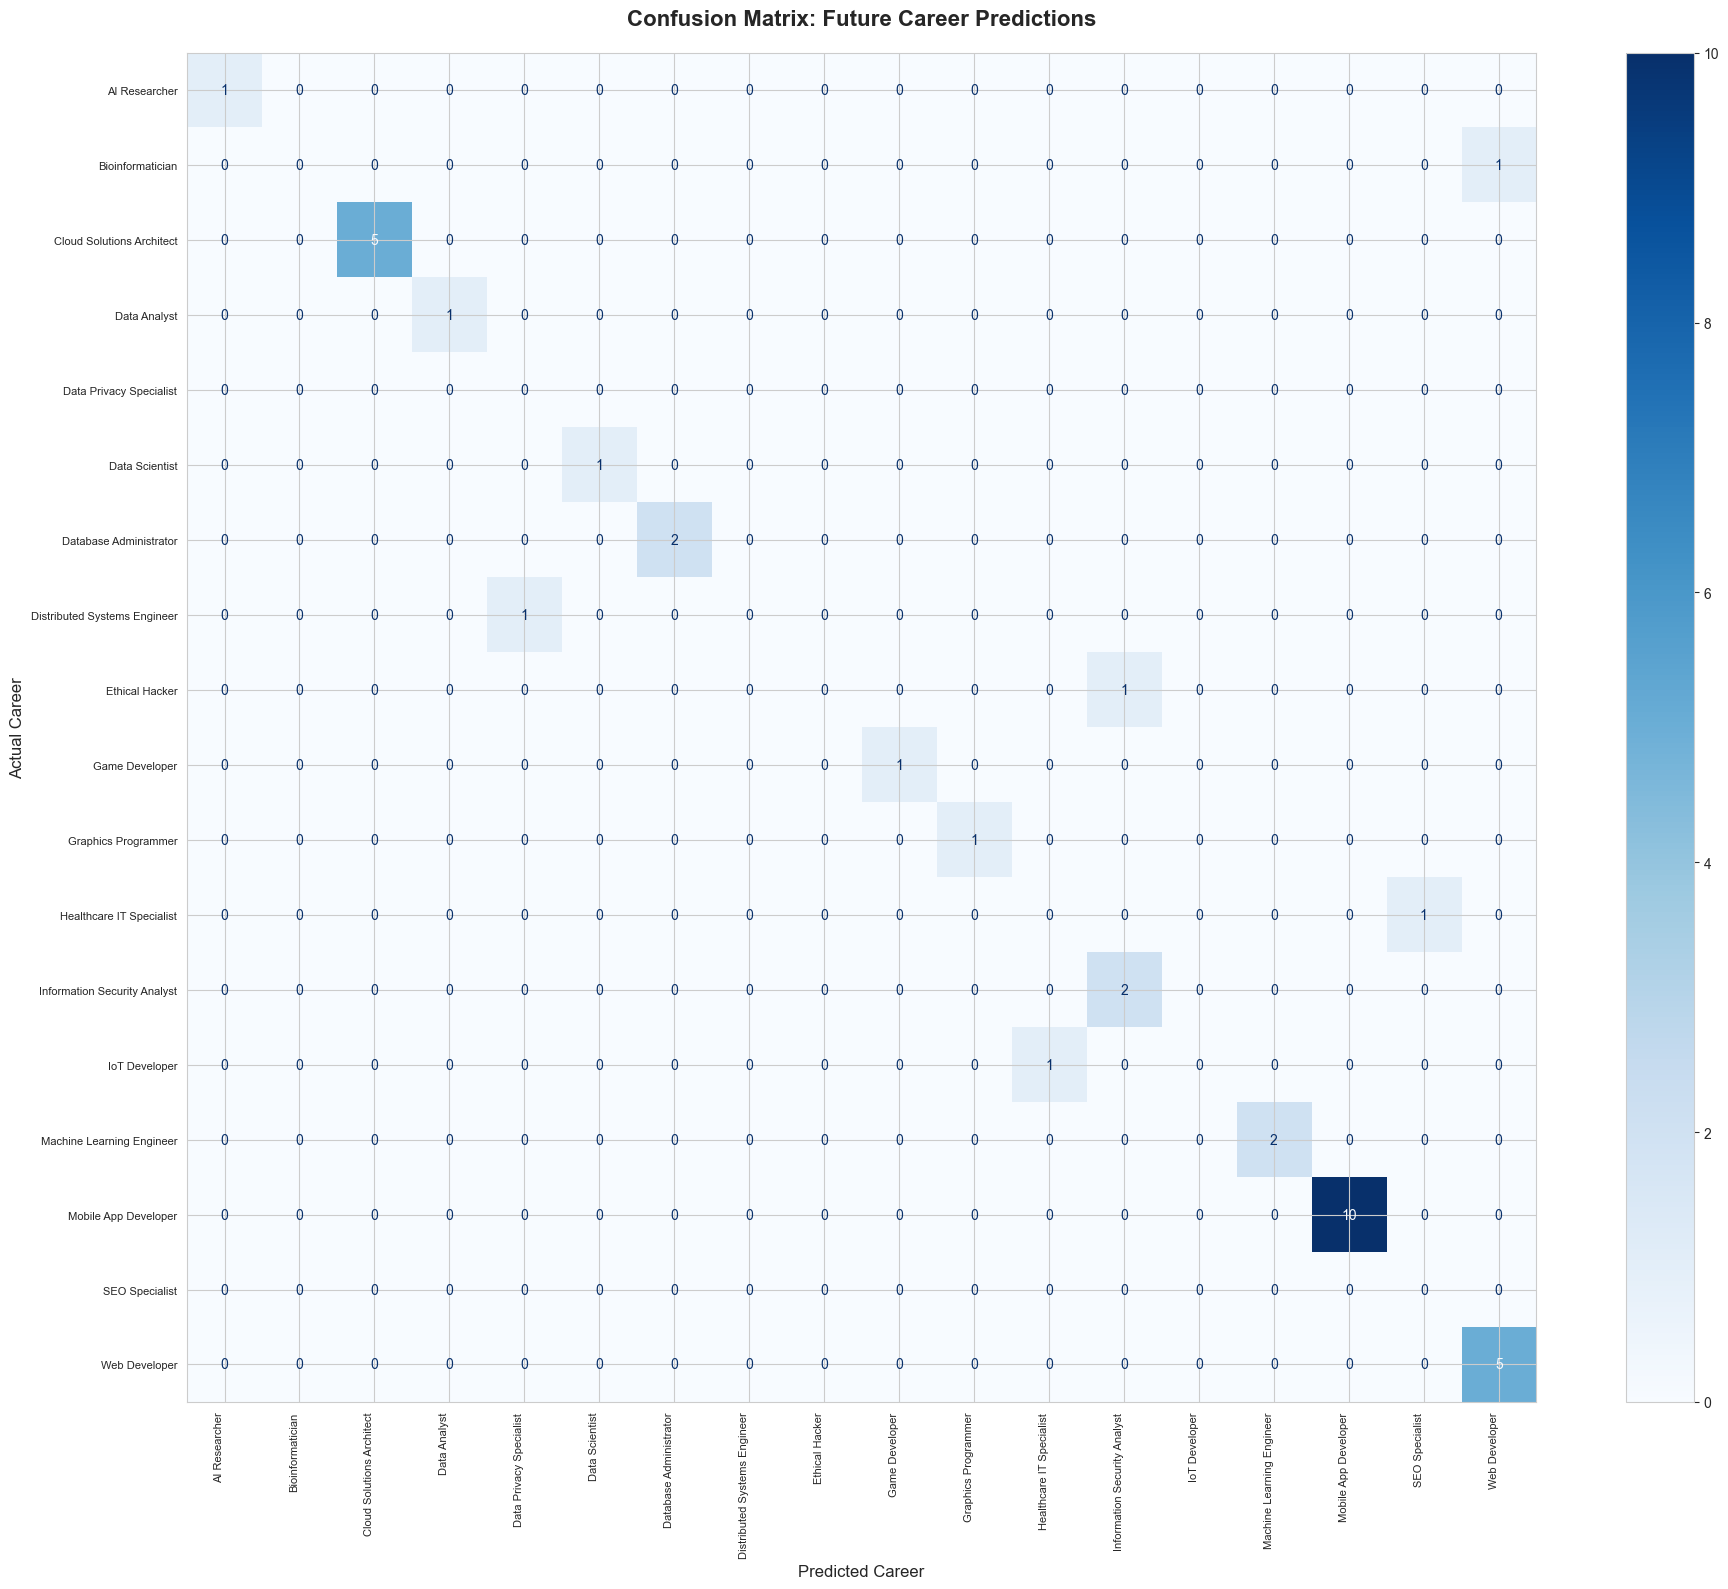


Confusion Matrix Interpretation:
  - Diagonal elements: Correct predictions
  - Off-diagonal elements: Misclassifications
  - Darker colors indicate higher frequency

Correct predictions (diagonal): 31/36 (86.11%)


In [63]:
# Generate confusion matrix
# Get all unique labels from both test and predictions to avoid label mismatch
all_labels = sorted(set(y_test.unique()).union(set(y_pred)))

cm = confusion_matrix(y_test, y_pred, labels=all_labels)

# Note: With many classes, the confusion matrix can be large and hard to read
print(f"Confusion matrix shape: {cm.shape[0]}x{cm.shape[1]} (for {len(all_labels)} career paths)")
print(f"Labels in test set: {len(y_test.unique())}")
print(f"Labels in predictions: {len(set(y_pred))}")
print(f"Total unique labels: {len(all_labels)}")

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(20, 16))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=all_labels)
disp.plot(cmap='Blues', values_format='d', ax=ax)
plt.title('Confusion Matrix: Future Career Predictions', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Predicted Career', fontsize=12)
plt.ylabel('Actual Career', fontsize=12)

# Rotate labels for better readability
plt.setp(ax.get_xticklabels(), rotation=90, ha='right', fontsize=8)
plt.setp(ax.get_yticklabels(), rotation=0, fontsize=8)

plt.tight_layout()
plt.show()

print("\nConfusion Matrix Interpretation:")
print("  - Diagonal elements: Correct predictions")
print("  - Off-diagonal elements: Misclassifications")
print("  - Darker colors indicate higher frequency")

# Show overall diagonal accuracy
diagonal_sum = np.trace(cm)
total_sum = np.sum(cm)
print(f"\nCorrect predictions (diagonal): {diagonal_sum}/{total_sum} ({diagonal_sum/total_sum*100:.2f}%)")


### Feature Importance Analysis

Let's examine which features are most important for predicting career paths.


TOP 20 MOST IMPORTANT FEATURES
                                      Feature  Importance
0                                         GPA    0.134075
1   Interested Domain_Artificial Intelligence    0.059453
86                                Python_Weak    0.053261
87                                SQL_Average    0.051207
91                                Java_Strong    0.042917
88                                 SQL_Strong    0.041924
18         Interested Domain_Machine Learning    0.039823
92                                  Java_Weak    0.036769
85                              Python_Strong    0.034623
11             Interested Domain_Data Science    0.033756
23     Interested Domain_Software Development    0.030592
61       Projects_Natural Language Processing    0.028920
90                               Java_Average    0.028444
12      Interested Domain_Database Management    0.027879
5           Interested Domain_Cloud Computing    0.027621
6         Interested Domain_Computer Grap

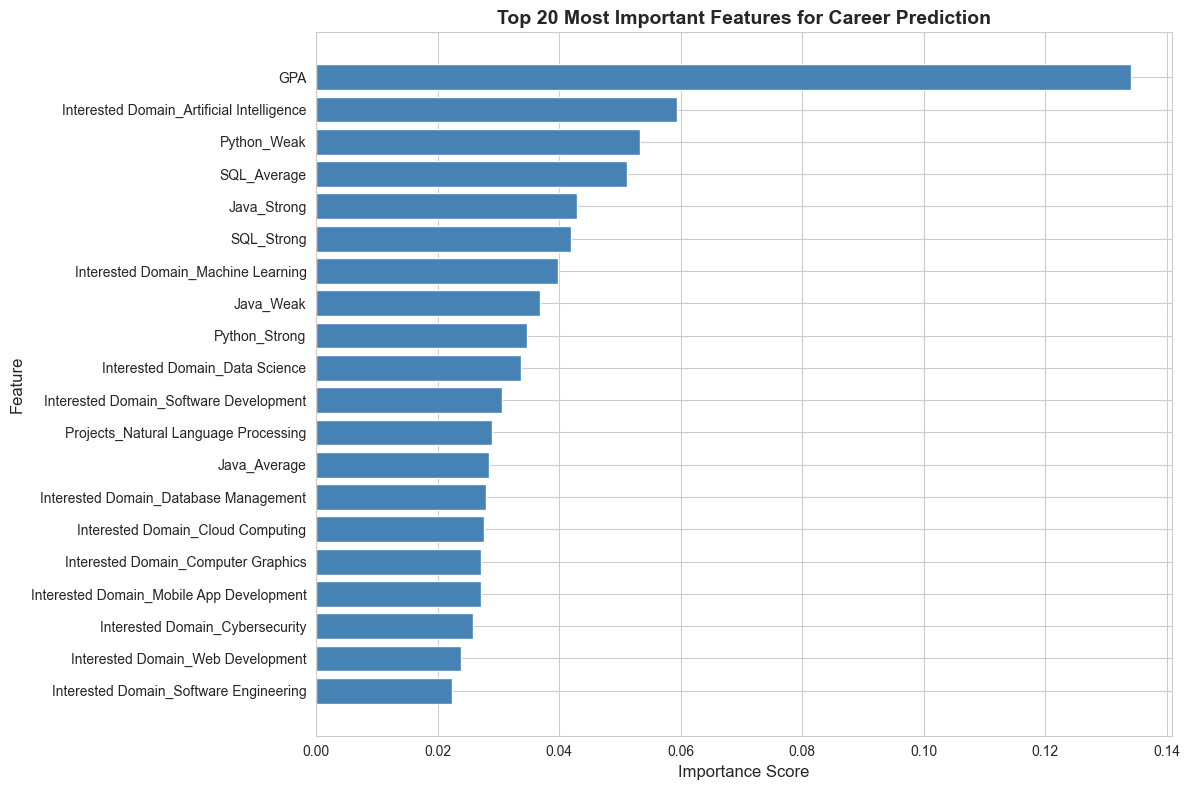

In [64]:
# Extract feature names after preprocessing
feature_names = (
    numerical_features +
    list(model_pipeline.named_steps['preprocessor']
         .named_transformers_['cat']
         .get_feature_names_out(categorical_features))
)

# Get feature importances from the Random Forest model
importances = model_pipeline.named_steps['classifier'].feature_importances_

# Create a dataframe for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print("="*80)
print("TOP 20 MOST IMPORTANT FEATURES")
print("="*80)
print(feature_importance_df.head(20))

# Visualize top 20 features
plt.figure(figsize=(12, 8))
top_20 = feature_importance_df.head(20)
plt.barh(range(len(top_20)), top_20['Importance'], color='steelblue')
plt.yticks(range(len(top_20)), top_20['Feature'])
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Top 20 Most Important Features for Career Prediction', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### 4.6 Model Performance Summary

Based on our evaluation, let's summarize the model's performance:

Model Strengths:

Successfully predicts career paths based on student profiles and handles multi-class classification effectively. Balanced performance across different career categories and incorporates both numerical (GPA) and categorical features

Key Predictive Features:
  - Interested Domain is highly predictive of career choice
  - Specific project types strongly indicate career paths
  - Programming skill levels contribute to predictions
  - GPA has moderate influence on career outcomes

Practical Applications:
  - Career counseling and guidance for CS students
  - Course recommendation based on career goals
  - Identifying skill gaps for desired career paths
  - Academic planning and specialization advice

In [65]:
print("="*80)
print("MODEL PERFORMANCE SUMMARY")
print("="*80)

print(f"""
✓ Model Type: Random Forest Classifier with Preprocessing Pipeline

✓ Performance Metrics:
  - Overall Accuracy: {accuracy*100:.2f}%
  - F1-Score (Macro): {f1_macro:.4f}
  - F1-Score (Weighted): {f1_weighted:.4f}
  """)


MODEL PERFORMANCE SUMMARY

✓ Model Type: Random Forest Classifier with Preprocessing Pipeline

✓ Performance Metrics:
  - Overall Accuracy: 86.11%
  - F1-Score (Macro): 0.5949
  - F1-Score (Weighted): 0.8374
  


## 5. Model Export

Now we'll export the complete trained pipeline (including preprocessing) using **joblib** for future use in production or inference scenarios.

The exported model includes:
- Feature preprocessing transformations (StandardScaler + OneHotEncoder)
- Trained Random Forest Classifier
- All fitted parameters and statistics


In [66]:
import joblib
from datetime import datetime

print("="*80)
print("MODEL EXPORT")
print("="*80)

# Define model filename with timestamp
model_filename = 'cs_students_career_predictor_model.pkl'

# Export the complete pipeline
joblib.dump(model_pipeline, model_filename)

print(f"\nModel exported successfully!")
print(f"  Filename: {model_filename}")
print(f"  Export date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print(f"\nModel includes:")
print(f"  - Preprocessing pipeline (StandardScaler + OneHotEncoder)")
print(f"  - Trained Random Forest Classifier")
print(f"  - All fitted parameters")

# Verify export by loading the model
loaded_model = joblib.load(model_filename)
print(f"\nModel verified: Successfully loaded from file")

# Test the loaded model
test_prediction = loaded_model.predict(X_test[:5])
print(f"\nModel functional test passed")
print(f"  Sample predictions on first 5 test cases:")
for i, (actual, predicted) in enumerate(zip(y_test.iloc[:5], test_prediction)):
    match = "✓" if actual == predicted else "✗"
    print(f"    {i+1}. Actual: {actual:30s} | Predicted: {predicted:30s} {match}")


MODEL EXPORT

Model exported successfully!
  Filename: cs_students_career_predictor_model.pkl
  Export date: 2026-02-23 20:40:06

Model includes:
  - Preprocessing pipeline (StandardScaler + OneHotEncoder)
  - Trained Random Forest Classifier
  - All fitted parameters

Model verified: Successfully loaded from file

Model functional test passed
  Sample predictions on first 5 test cases:
    1. Actual: Mobile App Developer           | Predicted: Mobile App Developer           ✓
    2. Actual: Mobile App Developer           | Predicted: Mobile App Developer           ✓
    3. Actual: Mobile App Developer           | Predicted: Mobile App Developer           ✓
    4. Actual: Database Administrator         | Predicted: Database Administrator         ✓
    5. Actual: AI Researcher                  | Predicted: AI Researcher                  ✓


## 6. Example: Making Predictions with the Exported Model

Here's how to use the exported model for making predictions on new student data:


In [67]:
print("="*80)
print("EXAMPLE: PREDICTION WITH EXPORTED MODEL")
print("="*80)

# Create example new student data
new_student_data = pd.DataFrame({
    'GPA': [3.8, 3.5, 3.9],
    'Interested Domain': ['Artificial Intelligence', 'Web Development', 'Data Science'],
    'Projects': ['Natural Language Processing', 'E-commerce Website', 'Machine Learning'],
    'Python': ['Strong', 'Weak', 'Strong'],
    'SQL': ['Average', 'Strong', 'Strong'],
    'Java': ['Weak', 'Strong', 'Weak']
})

print("\nNew student data for prediction:")
print(new_student_data)

# Load model and make predictions
model = joblib.load(model_filename)
predictions = model.predict(new_student_data)
prediction_probabilities = model.predict_proba(new_student_data)

print("\n" + "="*80)
print("PREDICTIONS")
print("="*80)
for i, (idx, row) in enumerate(new_student_data.iterrows()):
    print(f"\nStudent {i+1}:")
    print(f"  GPA: {row['GPA']}")
    print(f"  Interested in: {row['Interested Domain']}")
    print(f"  Skills: Python={row['Python']}, SQL={row['SQL']}, Java={row['Java']}")
    print(f"  → Predicted Career: {predictions[i]}")
    print(f"  → Confidence: {prediction_probabilities[i].max()*100:.1f}%")


EXAMPLE: PREDICTION WITH EXPORTED MODEL

New student data for prediction:
   GPA        Interested Domain                     Projects  Python      SQL  \
0  3.8  Artificial Intelligence  Natural Language Processing  Strong  Average   
1  3.5          Web Development           E-commerce Website    Weak   Strong   
2  3.9             Data Science             Machine Learning  Strong   Strong   

     Java  
0    Weak  
1  Strong  
2    Weak  

PREDICTIONS

Student 1:
  GPA: 3.8
  Interested in: Artificial Intelligence
  Skills: Python=Strong, SQL=Average, Java=Weak
  → Predicted Career: NLP Research Scientist
  → Confidence: 47.8%

Student 2:
  GPA: 3.5
  Interested in: Web Development
  Skills: Python=Weak, SQL=Strong, Java=Strong
  → Predicted Career: Web Developer
  → Confidence: 53.9%

Student 3:
  GPA: 3.9
  Interested in: Data Science
  Skills: Python=Strong, SQL=Strong, Java=Weak
  → Predicted Career: Data Scientist
  → Confidence: 34.1%


### Potential Improvements

1. **Hyperparameter Tuning**: Use GridSearchCV or RandomizedSearchCV to optimize model parameters
2. **Additional Models**: Compare with other algorithms (XGBoost, SVM, Neural Networks)
3. **Feature Engineering**: Create interaction features or skill combinations
4. **Ensemble Methods**: Combine multiple models for potentially better predictions

### Usage Instructions

To use the exported model:

```python
import joblib
import pandas as pd

# Load the model
model = joblib.load('cs_students_career_predictor_model.pkl')

# Prepare new data (same format as training)
new_data = pd.DataFrame({...})

# Make predictions
predictions = model.predict(new_data)
```